# Homework 7

### Eesha Singh
### EID: es38438
### Joshua Oh
### EID: jyo254

## Support Vector Machine 

In [11]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# Your allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [12]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

FileNotFoundError: [Errno 2] File Heart.csv does not exist: 'Heart.csv'

**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





In [ ]:
heart_df = heart_df.replace("Yes", 1)
heart_df = heart_df.replace("No", 0)

X = heart_df[["Age", "Sex", "Chol"]]
y = heart_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [ ]:
model = svm.SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion. 
Print the results. 


In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred), "\n")

print(classification_report(y_test,y_pred))

Accuracy Score: 0.5081967213114754 

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        35
           1       0.39      0.27      0.32        26

    accuracy                           0.51        61
   macro avg       0.47      0.48      0.47        61
weighted avg       0.49      0.51      0.49        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [ ]:
def compute_cost(X, y, W, regularization_factor):
    '''This function calculate the hinge loss. Primal Problem in SVM'''
    n = X.shape[0]
    distances = 1 - y * (np.dot(X, W))
    
    # This is our max(0, distance). 
    distances[distances < 0] = 0 
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    # This divide by 2 is not important. You can skip doing it 
    # because we want only to check if this cost is going down or not. 
    return (1 / 2 * np.dot(W, W) + hinge_loss)

In [ ]:
def calculate_gradient(X, y, W, regularization_factor):
      
    if type(y) == np.float64:
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - (y * np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0):
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X.loc[ind])
            
            
        dw += di
    
    dw = dw/len(y)  # average
    
    return dw

In [ ]:
x_0 = [1]*len(X_train)
X_train['x_0'] = x_0
X_train = X_train[['x_0', 'Age', 'Sex', 'Chol']]

x_01 = [1]*len(X_test)
X_test['x_0'] = x_01
X_test = X_test[['x_0', 'Age', 'Sex', 'Chol']]


weights = np.zeros(4)

<ipython-input-8-b682c12b9be9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['x_0'] = x_01


In [ ]:
# Now we optimize it using Gradient Descent. 
num_iterations = 100
learning_rate = 0.0001

regularization = 0.01

cost_list = []

for i in range(0, num_iterations):
    
    cost = compute_cost(X_train, y_train, weights, regularization)
    
    print("Epoch", i, "Cost is:", cost, "\n", "Weights:\n", weights, "\n")
    
    cost_list.append(cost)
    
    grad = calculate_gradient(X_train, y_train, weights, regularization)
    
    weights = weights - learning_rate * grad
    

Epoch 0 Cost is: 0.01 
 Weights:
 [0. 0. 0. 0.] 

Epoch 1 Cost is: 0.009854725921433431 
 Weights:
 x_0     4.669421e-07
Age     2.644215e-05
Sex     3.677686e-07
Chol    1.175950e-04
Name: 0, dtype: float64 

Epoch 2 Cost is: 0.009709480896229836 
 Weights:
 x_0     9.338376e-07
Age     5.288165e-05
Sex     7.355004e-07
Chol    2.351783e-04
Name: 0, dtype: float64 

Epoch 3 Cost is: 0.00956426491857883 
 Weights:
 x_0     0.000001
Age     0.000079
Sex     0.000001
Chol    0.000353
Name: 0, dtype: float64 

Epoch 4 Cost is: 0.009419077982671196 
 Weights:
 x_0     0.000002
Age     0.000106
Sex     0.000001
Chol    0.000470
Name: 0, dtype: float64 

Epoch 5 Cost is: 0.009273920082698875 
 Weights:
 x_0     0.000002
Age     0.000132
Sex     0.000002
Chol    0.000588
Name: 0, dtype: float64 

Epoch 6 Cost is: 0.009128791212854967 
 Weights:
 x_0     0.000003
Age     0.000159
Sex     0.000002
Chol    0.000705
Name: 0, dtype: float64 

Epoch 7 Cost is: 0.00898369136733374 
 Weights:
 x_0   

Epoch 59 Cost is: 0.005459612746295605 
 Weights:
 x_0     0.000019
Age     0.001062
Sex     0.000015
Chol    0.004483
Name: 0, dtype: float64 

Epoch 60 Cost is: 0.0054561831311895044 
 Weights:
 x_0     0.000019
Age     0.001067
Sex     0.000015
Chol    0.004501
Name: 0, dtype: float64 

Epoch 61 Cost is: 0.005452754201972128 
 Weights:
 x_0     0.000019
Age     0.001073
Sex     0.000016
Chol    0.004519
Name: 0, dtype: float64 

Epoch 62 Cost is: 0.005449325958506306 
 Weights:
 x_0     0.000019
Age     0.001078
Sex     0.000016
Chol    0.004537
Name: 0, dtype: float64 

Epoch 63 Cost is: 0.005446030487010718 
 Weights:
 x_0     0.000019
Age     0.001083
Sex     0.000016
Chol    0.004554
Name: 0, dtype: float64 

Epoch 64 Cost is: 0.0054429240079614475 
 Weights:
 x_0     0.000019
Age     0.001088
Sex     0.000016
Chol    0.004571
Name: 0, dtype: float64 

Epoch 65 Cost is: 0.005439846723617456 
 Weights:
 x_0     0.000020
Age     0.001093
Sex     0.000016
Chol    0.004588
Name: 0, 

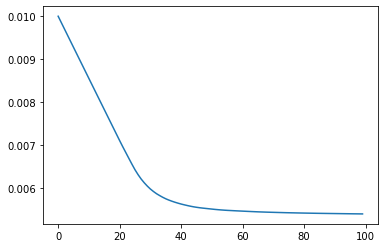

In [ ]:
plt.plot(np.arange(num_iterations), cost_list)
plt.show()

In [ ]:
def predict_svm(weights, X):
    """
    Predict the class between 0 and 1 using learned SVM parameters weights.
    """    
    return np.where(np.dot(X, weights)<0, -1, 1)

In [ ]:
svm_predict = predict_svm(weights, X_test)

print("Accuracy Score:", accuracy_score(y_test, svm_predict))

print(classification_report(y_test, svm_predict))

Accuracy Score: 0.4262295081967213
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.43      1.00      0.60        26

    accuracy                           0.43        61
   macro avg       0.21      0.50      0.30        61
weighted avg       0.18      0.43      0.25        61



C:\Users\joshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joshu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results with the logistic regression. You can use libraries for this task. 


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred), "\n")

print(classification_report(y_test, y_pred))

Accuracy Score: 0.7540983606557377 

              precision    recall  f1-score   support

           0       0.81      0.74      0.78        35
           1       0.69      0.77      0.73        26

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.76        61



### The logistic regression model has a much higher accuracy of 0.754.

# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn library and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [ ]:
svclassifier = svm.SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [ ]:
y_pred2 = svclassifier.predict(X_test)

In [ ]:
print("Accuracy Score:", accuracy_score(y_test, y_pred2), "\n")

print(classification_report(y_test, y_pred2))

Accuracy Score: 0.5409836065573771 

              precision    recall  f1-score   support

           0       0.57      0.83      0.67        35
           1       0.40      0.15      0.22        26

    accuracy                           0.54        61
   macro avg       0.48      0.49      0.45        61
weighted avg       0.50      0.54      0.48        61

